# Employee Attrition

In [1]:
import os 
import pandas as pd
import numpy as np

In [2]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '.jovianrc',
 'data',
 'Notebook.ipynb',
 'quiz1',
 'README.md',
 'sub1.csv',
 'sub2.csv',
 'sub3.csv',
 'sub4.csv',
 'sub5.csv']

### Read Data

In [3]:
# Read data
path = './data/train.csv'
df = pd.read_csv(path, parse_dates= ['MMM-YY', 'Dateofjoining', 'LastWorkingDate'], dayfirst=False)
df.head(10)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,2,0,1
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,2,0,1
7,2017-02-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,2,0,1
8,2017-03-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,2,350000,1
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1


In [4]:
def std_col_names(df):
    """
    - Convert feature names to lower case
    - Rename reporting date column 
    """
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
    df.rename(columns= {'mmm-yy': 'record_dt'}, inplace= True)
    return df

In [5]:
df = std_col_names(df)
df.head(3)


,record_dt,emp_id,age,gender,city,education_level,salary,dateofjoining,lastworkingdate,joining_designation,designation,total_business_value,quarterly_rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2


In [6]:
df.columns.to_list()

['record_dt',
 'emp_id',
 'age',
 'gender',
 'city',
 'education_level',
 'salary',
 'dateofjoining',
 'lastworkingdate',
 'joining_designation',
 'designation',
 'total_business_value',
 'quarterly_rating']

# Observing the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   record_dt             19104 non-null  datetime64[ns]
 1   emp_id                19104 non-null  int64         
 2   age                   19104 non-null  int64         
 3   gender                19104 non-null  object        
 4   city                  19104 non-null  object        
 5   education_level       19104 non-null  object        
 6   salary                19104 non-null  int64         
 7   dateofjoining         19104 non-null  datetime64[ns]
 8   lastworkingdate       1616 non-null   datetime64[ns]
 9   joining_designation   19104 non-null  int64         
 10  designation           19104 non-null  int64         
 11  total_business_value  19104 non-null  int64         
 12  quarterly_rating      19104 non-null  int64         
dtypes: datetime64[ns

`LastWorkingDate` seems to be the only column with missing data, which can be taken care of  

In [8]:
df.describe()

,emp_id,age,salary,joining_designation,designation,total_business_value,quarterly_rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


### Adding LWD to relevant columns

In [9]:
# Extract last working date of all attrited employees 
lwd_df = df[['emp_id', 'lastworkingdate']].dropna().rename(columns= {'lastworkingdate': 'lwd'})
lwd_df.head(2)

,emp_id,lwd
2,1,2016-03-11
9,4,2017-04-27


In [10]:
# Add last working date to all relevant employees
merged = df.merge(lwd_df, left_on= 'emp_id', right_on= 'emp_id', how= 'outer')
merged.head()

,record_dt,emp_id,age,gender,city,education_level,salary,dateofjoining,lastworkingdate,joining_designation,designation,total_business_value,quarterly_rating,lwd
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,2016-03-11
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,2016-03-11
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,2016-03-11
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,NaT
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,NaT


In [11]:

merged.lwd.isna().value_counts()

False    10359
True      8745
Name: lwd, dtype: int64

In [12]:
# Convert quarterly_rating feature to categorical type
merged['quarterly_rating'] = merged['quarterly_rating'].astype('str')

In [13]:
merged['quarterly_rating'].dtype

dtype('O')

### Calculate tenure

In [14]:
# Calculate number of months the employee has worked, for each record 
merged['tenure'] = ((merged.record_dt - merged.dateofjoining)/np.timedelta64(1, 'M')+1).astype('int')
merged.head(3)

,record_dt,emp_id,age,gender,city,education_level,salary,dateofjoining,lastworkingdate,joining_designation,designation,total_business_value,quarterly_rating,lwd,tenure
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,2016-03-11,1
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,2016-03-11,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,2016-03-11,3


### Evaluate months before attrition

In [15]:
# Add a default date to employees who have not attrited
merged.lwd.fillna(value=pd.to_datetime('1/1/2015'), inplace=True)
merged.head(5)

,record_dt,emp_id,age,gender,city,education_level,salary,dateofjoining,lastworkingdate,joining_designation,designation,total_business_value,quarterly_rating,lwd,tenure
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,2016-03-11,1
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,2016-03-11,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,2016-03-11,3
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,2015-01-01,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,2015-01-01,1


In [16]:
# Evaluate change in designation level for each record from joining designation level
merged['grade_chg_join'] = merged['designation'] - merged['joining_designation'] 
merged.head()

,record_dt,emp_id,age,gender,city,education_level,salary,dateofjoining,lastworkingdate,joining_designation,designation,total_business_value,quarterly_rating,lwd,tenure,grade_chg_join
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,2016-03-11,1,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,2016-03-11,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,2016-03-11,3,0
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,2015-01-01,0,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,2015-01-01,1,0


In [17]:
# merged.merge(q2_df, left_on= 'record_dt', right_on= 'record_dt', how= 'outer')

In [18]:
# Evaluate median salary for a given period for each record
q2_df = merged.sample(frac= 0.75, replace= True, random_state= 1).groupby(by= 'record_dt').agg({'salary': ['median']})
q2_df.reset_index(inplace=True)
q2_df.columns = q2_df.columns.get_level_values(0)
q2_df.rename(columns= {'salary':'median_salary'}, inplace= True)
q2_df

,record_dt,median_salary
0,2016-01-01,55187.5
1,2016-02-01,55662.0
2,2016-03-01,54491.0
3,2016-04-01,56813.0
4,2016-05-01,56242.0
5,2016-06-01,56666.0
6,2016-07-01,59094.5
7,2016-08-01,60539.5
8,2016-09-01,62931.0
9,2016-10-01,61994.0


In [19]:
# Add the median salary for the reporting date to each record
merged = merged.merge(q2_df, left_on= 'record_dt', right_on= 'record_dt', how= 'outer').sort_values(['emp_id', 'record_dt']).reset_index(drop= True)


In [20]:
# Calculate the delta salary from median for each record
merged['q2_delta'] = merged['salary'] - merged['median_salary']
merged.head()

,record_dt,emp_id,age,gender,city,education_level,salary,dateofjoining,lastworkingdate,joining_designation,designation,total_business_value,quarterly_rating,lwd,tenure,grade_chg_join,median_salary,q2_delta
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,2016-03-11,1,0,55187.5,2199.5
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,2016-03-11,2,0,55662.0,1725.0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,2016-03-11,3,0,54491.0,2896.0
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,2015-01-01,0,0,64444.0,2572.0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,2015-01-01,1,0,65599.5,1416.5


### Separate out the test set

In [21]:
# Read test data
test = pd.read_csv('./data/test.csv')
test = std_col_names(test)
test.head()

,emp_id
0,394
1,173
2,1090
3,840
4,308


In [22]:
# Extract all records for the reporting date -> '2017-12-01'
# These records will be used as test data based on emp_id provided in test.csv
test_df = merged[merged['record_dt'] == '2017-12-01']
test_df.head(3)

,record_dt,emp_id,age,gender,city,education_level,salary,dateofjoining,lastworkingdate,joining_designation,designation,total_business_value,quarterly_rating,lwd,tenure,grade_chg_join,median_salary,q2_delta
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,2015-01-01,1,0,65599.5,1416.5
17,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaT,3,3,0,2,2015-01-01,5,0,65599.5,13128.5
21,2017-12-01,11,28,Female,C19,Master,42172,2017-12-07,NaT,1,1,0,1,2015-01-01,0,0,65599.5,-23427.5


In [23]:
# Obtain final test set
fin_test = test.merge(test_df, left_on='emp_id', right_on= 'emp_id', how= 'inner')
fin_test.head(3)

,emp_id,record_dt,age,gender,city,education_level,salary,dateofjoining,lastworkingdate,joining_designation,designation,total_business_value,quarterly_rating,lwd,tenure,grade_chg_join,median_salary,q2_delta
0,394,2017-12-01,34,Female,C20,Master,97722,2011-06-06,NaT,2,4,2701750,3,2015-01-01,78,2,65599.5,32122.5
1,173,2017-12-01,39,Male,C28,College,56174,2011-06-13,NaT,1,3,706010,3,2015-01-01,78,2,65599.5,-9425.5
2,1090,2017-12-01,39,Male,C13,College,96750,2011-06-27,NaT,2,4,1518520,2,2015-01-01,78,2,65599.5,31150.5


In [24]:
len(fin_test)

741

In [25]:
# Separate test data from train frame
fin_train = merged[merged['record_dt'] != '2017-12-01']
len(fin_train)

18285

In [26]:
fin_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 19102
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   record_dt             18285 non-null  datetime64[ns]
 1   emp_id                18285 non-null  int64         
 2   age                   18285 non-null  int64         
 3   gender                18285 non-null  object        
 4   city                  18285 non-null  object        
 5   education_level       18285 non-null  object        
 6   salary                18285 non-null  int64         
 7   dateofjoining         18285 non-null  datetime64[ns]
 8   lastworkingdate       1538 non-null   datetime64[ns]
 9   joining_designation   18285 non-null  int64         
 10  designation           18285 non-null  int64         
 11  total_business_value  18285 non-null  int64         
 12  quarterly_rating      18285 non-null  object        
 13  lwd             

In [27]:
# extracted = sorted(fin_test['emp_id'])
# main = sorted(test_df['emp_id'])
# len(main), len(extracted)

In [28]:
# diff_emp_id = [x for x in main if x not in extracted]

### Create target variable

In [29]:
# Create the target variable attr_risk
# Calculate months before attrition for all records
merged['t_attr'] = ((merged.lwd - merged.record_dt)/np.timedelta64(1, 'M')).astype('int')

In [30]:
# merged['attr_risk'] = merged['t_attr'].apply(lambda x: 0 if (x<0 or x>6) else 1)
# merged.head(10)

### Vectorize input

In [31]:
# Obtain input features and output target
cols= [
'age',
 'gender',
 'city',
 'education_level',
'total_business_value',
 'quarterly_rating',
'tenure',
 'grade_chg_join',
 'q2_delta'
]

target = 'attr_risk'

In [32]:
assert fin_train[cols].columns.to_list() == fin_test[cols].columns.to_list()

In [33]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse= False)

In [34]:
# Vetorize train data
train_dict = fin_train[cols].to_dict(orient= 'records')
train_dv = dv.fit_transform(train_dict)

In [35]:
# Vectorize test data
test_dict = fin_test[cols].to_dict(orient= 'records')
test_dv = dv.transform(test_dict)

In [36]:
(f'Total features: {len(dv.get_feature_names())}')

'Total features: 43'

In [37]:
f'Train length: {len(train_dv)}, Test length: {len(test_dv)}'

'Train length: 18285, Test length: 741'

### Binarize the output of above code based on logic:

   \begin{equation}
       attrition.risk = 
        \begin{cases}
            1 & \text{if $t.attr >0 $ and $t.attr < 7 $} \\
            0 & \text{otherwise}
        \end{cases}
    \end{equation}

In [38]:
fin_train['t_attr'] = ((fin_train.lwd - fin_train.record_dt)/np.timedelta64(1, 'M')).astype('int')

fin_train['attr_risk'] = fin_train['t_attr'].apply(lambda x: 0 if (x<0 or x>6) else 1)

/tmp/ipykernel_4515/1359534664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_train['t_attr'] = ((fin_train.lwd - fin_train.record_dt)/np.timedelta64(1, 'M')).astype('int')
/tmp/ipykernel_4515/1359534664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_train['attr_risk'] = fin_train['t_attr'].apply(lambda x: 0 if (x<0 or x>6) else 1)


In [39]:
# Store train targets
y_train = fin_train['attr_risk']

## Fit model (XGB)

In [40]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import tqdm
from tqdm import tqdm

In [41]:
# Split into train, validation
x_, x_val, y_, y_val = train_test_split(train_dv, y_train, test_size = 0.2, random_state= 42)

In [42]:
# View feature names after encoding 
dv.get_feature_names()[:5]

['age', 'city=C1', 'city=C10', 'city=C11', 'city=C12']

In [43]:
# Tuning parameter grid
cv_params = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10], 
    'min_child_weight': [1,2,3,4],
    'subsample': [0.8,0.9,1], 
    'max_delta_step': [0,1,2,4],
    'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'n_estimators' : [5, 10, 15, 25, 50, 75, 100, 150],
    'booster': ['gbtree', 'dart']
}   

# Parameters fixed
fix_params = {'objective': 'binary:logistic', 'eval_metric': 'logloss', 'use_label_encoder': False}  

# Create RandomizedSearchCV object
csv = RandomizedSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1_macro', cv = 15, verbose=2, n_jobs= -1, n_iter= 60, random_state=42) #, random_state=42



In [44]:
# #Fit the tuner to train data


# csv.fit(x_, y_)

In [45]:
# print(f'Best score: {csv.best_score_}')

In [46]:
# # Add the best parameters to final parameter list
# rcv = csv.best_params_
# fin_params = fix_params
# fin_params.update(rcv)
# fin_params

In [47]:
# Final model parameter list; in case

fin_params = {'objective': 'binary:logistic',
 'eval_metric': 'logloss',
 'use_label_encoder': False,
 'subsample': 0.9,
 'n_estimators': 75,
 'min_child_weight': 1,
 'max_depth': 10,
 'max_delta_step': 2,
 'learning_rate': 0.2,
 'booster': 'gbtree'}

In [48]:
# Train the subset of train data
tmp_train = xgb.DMatrix(x_, y_)
tmp_val = xgb.DMatrix(x_val, y_val)
tmp_xgb = xgb.train(fin_params, tmp_train, num_boost_round = 100)

[21:37:39] WARNING: ../src/learner.cc:573: 
Parameters: { "n_estimators", "use_label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [49]:
# Evaluate on val set
y_val_pred = tmp_xgb.predict(tmp_val)
thresh = 0.5
y_val_pred [y_val_pred > thresh] = 1
y_val_pred [y_val_pred <= thresh] = 0
y_val_pred = y_val_pred.astype('int')
pd.Series(y_val_pred).value_counts()

0    2028
1    1629
dtype: int64

In [50]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve
import matplotlib.pyplot as plt
import itertools

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def show_data(cm, print_res = 0):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    f1 = (2*p*r)/(p+r)
    if print_res == 1:
        print(f'Precision = {p:.3f}')
        print(f'Recall (TPR) =  {r:.3f}')
        print(f'F1 score: {f1:.3f}')
    return p, r, f1



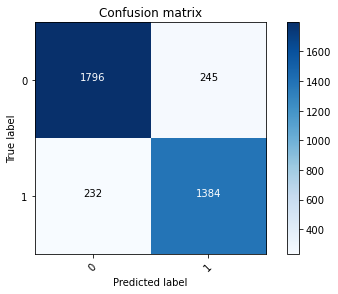

Precision = 0.850
Recall (TPR) =  0.856
F1 score: 0.853


In [52]:
cm = confusion_matrix(y_val, y_val_pred)
plot_confusion_matrix(cm, ['0', '1'])
p, r, f1 = show_data(cm, print_res = 1)


In [53]:
def obs_thresh(thresh_range, model, ip):
    """
    Plot the F1 score for a range of thresholds
    """
    obs_dict = {}
    vc_mat= []
    
    for thresh in thresh_range:
        pred = model.predict(ip)
        pred [pred > thresh] = 1
        pred [pred <= thresh] = 0
        pred = pred.astype('int')
        
        cm = confusion_matrix(y_val, pred)
        f1 = show_data(cm, print_res = 0)[2]
        obs_dict[thresh] = f1
        vc_mat.append(pd.Series(pred).value_counts())
    return obs_dict, vc_mat

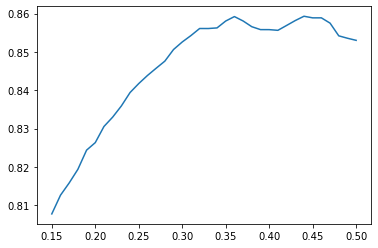

In [54]:
thresh_range = list(np.linspace(0.15, 0.5, 36))

obs_dict, vc_mat= obs_thresh(thresh_range, tmp_xgb, tmp_val)

plt.plot(obs_dict.keys(), obs_dict.values())


In [55]:
thresh = round(list(obs_dict.keys())[list(obs_dict.values()).index(0.84173249795696)], 2) #max(obs_dict.values())
# round(sum(list(obs_dict.values())) / len(list(obs_dict.values())), 3) #> 0.841
thresh

0.25

### Final train

In [56]:
# Train model on entire set
dtrain = xgb.DMatrix(train_dv, y_train)
dtest = xgb.DMatrix(test_dv)
fin_xgb = xgb.train(fin_params, dtrain, num_boost_round = 200)

[21:37:43] WARNING: ../src/learner.cc:573: 
Parameters: { "n_estimators", "use_label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [57]:
# Evaluate predictions on test set
test_pred = fin_xgb.predict(dtest)
test_pred[test_pred>thresh] = 1
test_pred[test_pred <= thresh] = 0
test_pred= test_pred.astype('int')

### Get submission

In [58]:
def get_sub(arr, emp= fin_test['emp_id'], outfile= 'sub.csv'):
    """
    Convert predicted output to a dataframe and extract to local
    """
    out_df = pd.DataFrame([emp, arr]).T
    out_df.rename(columns= {'emp_id': 'Emp_ID', 'Unnamed 0': 'Target'}, inplace= True)
    out_df.to_csv(outfile, index= False)
    return out_df

In [59]:
# # Obtain submission
# sub1 = get_sub(test_pred, outfile= 'sub5.csv')

## References
- [pd.merge](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas-merge)
- [time in days to months](https://stackoverflow.com/questions/42822768/pandas-number-of-months-between-two-dates/42822819)
- [multiindex columns](https://towardsdatascience.com/accessing-data-in-a-multiindex-dataframe-in-pandas-569e8767201d)
- [multi-index](https://stackoverflow.com/questions/14507794/pandas-how-to-flatten-a-hierarchical-index-in-columns)
- [optimizing f1 xgb](https://www.kaggle.com/dstuerzer/optimization-of-xgboost#Grid-Search---Maximizing-the-F1-Score)
